## ---------------------
#### Dataset: FIFA 19 Football Player Attributes.
#### Source: Kaggle.
#### Operation: Exploratory Data Analysis.
#### Note: The dataset has been uploaded along with the assignment for using with this notebook.

## ---------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from numpy import nan
import seaborn as sns
%matplotlib inline

Loading the dataset into a dataframe.

In [2]:
df = pd.read_csv("fifaplayerdata.csv")

Finding out the dataframe shape i.e. what is its structure? how many columns and rows does it have?

In [3]:
df.shape

(18207, 89)

The dataframe has 18207 rows and 89 columns.

Updating the setting to display all 89 columns when we print out the dataframe.

In [4]:
pd.set_option('display.max_columns', 89)

Getting an idea of the dataframe by printing out its firts 5 rows.

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Dropping the unnamed column and giving the index a title of 'Rank'.

In [6]:
df.index.name = 'Rank'
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

A list of all the columns in the dataframe.

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Getting info on every column. The datatype for that column and the number of non-null values that the data column contains.

In [8]:
df.drop(['Loaned From', 'Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

Dropping NA values, converting the Release clause from string(€150M) to 150000000(numeric)

In [10]:
df.dropna(axis = 0, inplace = True)
df['Release Clause'] = df['Release Clause'].str.replace('€', '')
df['Release Clause'] = df['Release Clause'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)

In [11]:
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)
df['Weight'] = df['Weight'].str.replace('lbs', '')

Getting statistical measures for all attributes using the describe method.

In [12]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,14743.000000,14743.000000,14743.000000,14743.000000,1.474300e+04,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.00000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.00000,14743.000000,14743.000000,14743.000000,1.474300e+04
mean,214632.725836,25.114088,66.381808,71.334871,2.551617e+06,9990.639626,1666.474259,1.117073,3.001221,2.523435,19.522553,54.150783,49.554840,56.98908,62.580140,46.590518,60.425965,51.171471,46.405752,56.098962,63.062335,67.835380,67.896832,66.365258,62.165638,66.602862,59.475141,66.085193,67.387031,65.924981,51.255715,59.731601,50.634674,54.672997,55.395985,51.998101,60.304823,51.464763,52.115105,49.838160,10.503764,10.55952,10.560537,10.528793,10.506817,4.789646e+06
std,29143.591638,4.594359,6.889961,6.099177,5.833752e+06,22834.380828,198.177615,0.400780,0.635514,0.616425,15.701907,14.163962,16.344687,11.61646,9.845651,14.792342,12.547495,15.171919,15.103861,12.400078,10.045939,11.780846,11.512529,12.353436,8.865933,12.160377,13.261653,11.543718,11.266826,12.572630,15.763188,14.411320,18.752402,14.700189,12.934748,12.528973,10.232503,17.167619,19.085715,19.081212,3.099594,3.08087,3.144226,3.075250,3.103504,1.133151e+07
min,16.000000,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,1000.000000,1.000000,1.000000,2.000000,2.000000,11.000000,10.000000,15.00000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,26.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,29.000000,10.000000,10.000000,10.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.300000e+04
25%,200208.000000,21.000000,62.000000,67.000000,3.500000e+05,1000.000000,1524.000000,1.000000,3.000000,2.000000,8.000000,44.000000,36.000000,49.00000,57.000000,35.000000,54.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,35.000000,46.000000,47.000000,42.000000,53.000000,38.000000,36.000000,33.000000,8.000000,8.00000,8.000000,8.000000,8.000000,5.780000e+05
50%,221696.000000,25.000000,66.000000,71.000000,7.250000e+05,3000.000000,1669.000000,1.000000,3.000000,2.000000,17.000000,56.000000,52.000000,58.00000,64.000000,46.000000,62.000000,51.000000,44.000000,58.000000,64.000000,69.000000,69.000000,68.000000,62.000000,68.000000,61.000000,67.000000,68.000000,67.000000,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,10.000000,11.00000,11.000000,10.000000,10.000000,1.200000e+06
75%,236987.500000,28.000000,71.000000,75.000000,2.200000e+06,9000.000000,1806.000000,1.000000,3.000000,3.000000,26.000000,65.000000,63.000000,65.00000,69.000000,58.000000,69.000000,63.000000,58.000000,65.000000,70.000000,76.000000,76.000000,75.000000,68.000000,75.000000,69.000000,74.000000,75.000000,75.000000,64.000000,70.000000,65.000000,65.000000,65.000000,61.000000,68.000000,65.000000,67.000000,65.000000,13.000000,13.00000,13.000000,13.000000,13.000000,3.800000e+06
max,246620.000000,39.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5

Plotting histograms for different attributes present in the dataframe to get an idea of the frequency distribution for different attributes.

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Overall'}>,
        <AxesSubplot:title={'center':'Potential'}>,
        <AxesSubplot:title={'center':'Value'}>,
        <AxesSubplot:title={'center':'Wage'}>,
        <AxesSubplot:title={'center':'Special'}>],
       [<AxesSubplot:title={'center':'International Reputation'}>,
        <AxesSubplot:title={'center':'Weak Foot'}>,
        <AxesSubplot:title={'center':'Skill Moves'}>,
        <AxesSubplot:title={'center':'Jersey Number'}>,
        <AxesSubplot:title={'center':'Crossing'}>,
        <AxesSubplot:title={'center':'Finishing'}>,
        <AxesSubplot:title={'center':'HeadingAccuracy'}>],
       [<AxesSubplot:title={'center':'ShortPassing'}>,
        <AxesSubplot:title={'center':'Volleys'}>,
        <AxesSubplot:title={'center':'Dribbling'}>,
        <AxesSubplot:title={'center':'Curve'}>,
        <AxesSubplot:title={'center':'FKAccuracy'}>,
        <Axe

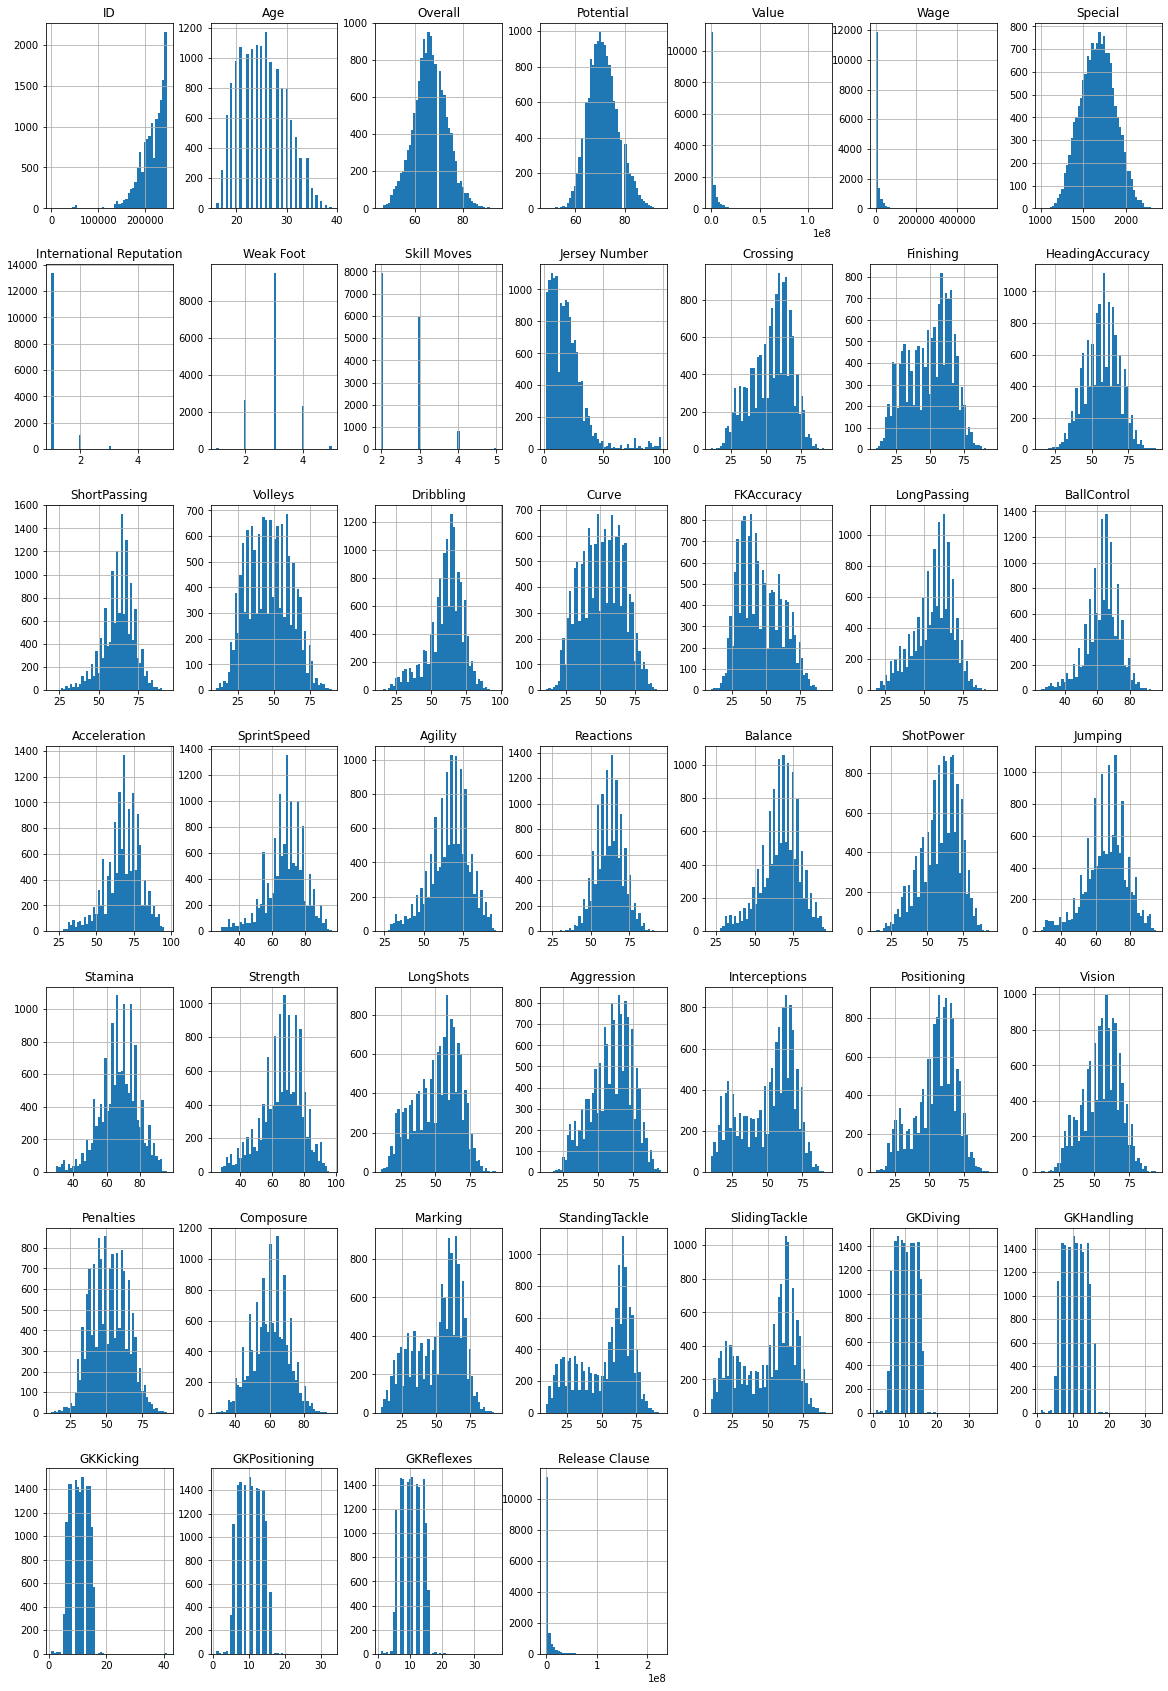

In [13]:
df.hist(bins=50,figsize=(20,30))

Getting the different categories/values present in a non-numeric column. Here we get the number of players for each postion in the Position column of the dataframe.

In [14]:
df['Position'].value_counts()

ST     1924
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     877
CDM     873
RCB     615
LCB     595
RCM     355
LCM     353
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: Position, dtype: int64

Plotting histogram for the 'Age' column. We can see that a majority of the players are in the category 20-27 years olds with gradual decrease post that age.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

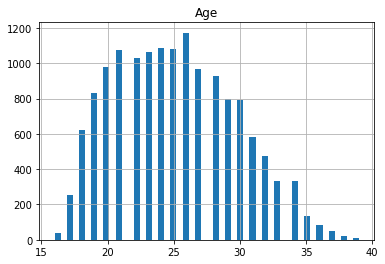

In [15]:
df.hist(column = 'Age', bins=50)

The Football Clubs and the respective number of players that they have in the Top 100. 

In [16]:
df.head(100)['Club'].value_counts()

Manchester City        11
Real Madrid            10
Juventus               10
FC Barcelona            9
FC Bayern München       7
Atlético Madrid         7
Paris Saint-Germain     5
Inter                   5
Tottenham Hotspur       5
Napoli                  4
Liverpool               4
Manchester United       3
Arsenal                 3
Chelsea                 3
FC Porto                2
Roma                    2
Lazio                   2
FC Schalke 04           1
Olympique Lyonnais      1
Borussia Dortmund       1
Vissel Kobe             1
Beşiktaş JK             1
Sporting CP             1
LA Galaxy               1
Valencia CF             1
Name: Club, dtype: int64

As we can see above, 'Arsenal' has 3 players in top 100. Below we find out which are those three players.

In [17]:
df.head(100)[df['Club'] == 'Arsenal']

<ipython-input-17-66e28dfa66b8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.head(100)[df['Club'] == 'Arsenal']


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,59000000.0,265000.0,2069,Right,3.0,4.0,4.0,Medium/ Low,Lean,Yes,LM,14.0,"Jan 31, 2018",2021,6'2,176,84+3,84+3,84+3,83+3,83+3,83+3,83+3,83+3,81+3,81+3,81+3,81+3,73+3,73+3,73+3,81+3,64+3,58+3,58+3,58+3,64+3,61+3,52+3,52+3,52+3,61+3,77.0,88.0,79.0,77.0,86.0,79.0,80.0,74.0,64.0,82.0,93.0,95.0,76.0,87.0,70.0,82.0,79.0,76.0,76.0,79.0,43.0,48.0,90.0,77.0,76.0,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,112100000.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,1911,Left,4.0,2.0,4.0,Medium/ Low,Lean,Yes,CAM,10.0,"Sep 2, 2013",2021,5'11,168,75+3,75+3,75+3,82+3,81+3,81+3,81+3,82+3,84+3,84+3,84+3,82+3,78+3,78+3,78+3,82+3,57+3,56+3,56+3,56+3,57+3,52+3,40+3,40+3,40+3,52+3,83.0,73.0,54.0,89.0,80.0,84.0,84.0,77.0,82.0,90.0,72.0,69.0,79.0,84.0,70.0,70.0,48.0,69.0,57.0,75.0,48.0,24.0,83.0,91.0,67.0,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
87,193301,A. Lacazette,27,France,85,86,Arsenal,45000000.0,180000.0,2060,Right,3.0,4.0,4.0,High/ High,Normal,Yes,ST,9.0,"Jul 5, 2017",2022,5'9,161,82+3,82+3,82+3,81+3,83+3,83+3,83+3,81+3,81+3,81+3,81+3,79+3,74+3,74+3,74+3,79+3,62+3,60+3,60+3,60+3,62+3,59+3,54+3,54+3,54+3,59+3,64.0,88.0,73.0,80.0,81.0,85.0,74.0,71.0,59.0,83.0,81.0,84.0,85.0,85.0,85.0,83.0,76.0,79.0,73.0,75.0,70.0,42.0,86.0,76.0,84.0,85.0,29.0,42.0,30.0,11.0,6.0,9.0,5.0,6.0,88900000.0


The average age of the top 100 Football players in the world. 

In [18]:
df.head(100)['Age'].mean()

28.02

The positions and respective players for those positions in top 100. We can see there are 12 Goalkeepers, 10 Strikers and so on in the top 100 players.

In [19]:
df.head(100)['Position'].value_counts()

ST     11
RCB    10
LCB     8
CAM     8
LM      8
RCM     7
CB      7
LB      6
LCM     5
LW      5
RW      5
CDM     4
LF      3
LS      2
CM      2
RM      2
RS      2
RF      2
LDM     1
RDM     1
RB      1
Name: Position, dtype: int64

### Plots. 

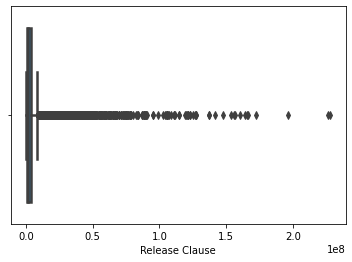

In [20]:
ax = sns.boxplot(x=df['Release Clause'],linewidth=2.5)

Box plot for player's age

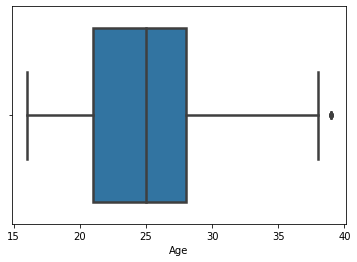

In [21]:
ax = sns.boxplot(x=df['Age'],linewidth=2.5)

Box plot for top 100 players age. Indicates that the top 100 players are slightly older than the general average. Indicating that experience is essential to reach that level.

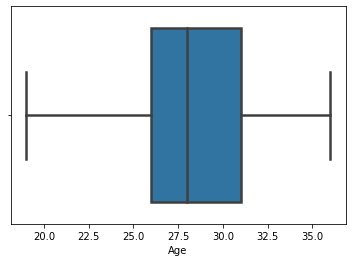

In [22]:
ax = sns.boxplot(x=df.head(100)['Age'],linewidth=2.5)

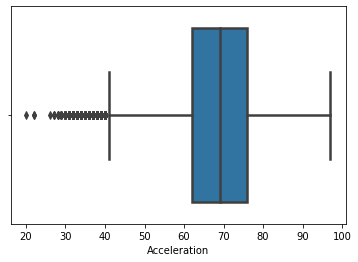

In [23]:
ax = sns.boxplot(x=df['Acceleration'],linewidth=2.5)

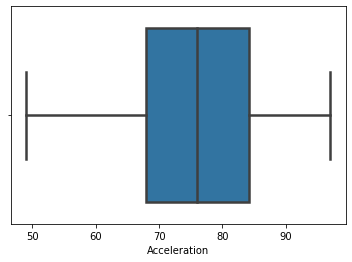

In [24]:
ax = sns.boxplot(x=df.head(100)['Acceleration'],linewidth=2.5)

### Countries with players in top 100.

In [25]:
country_data = dict(df.head(100)['Nationality'].value_counts())

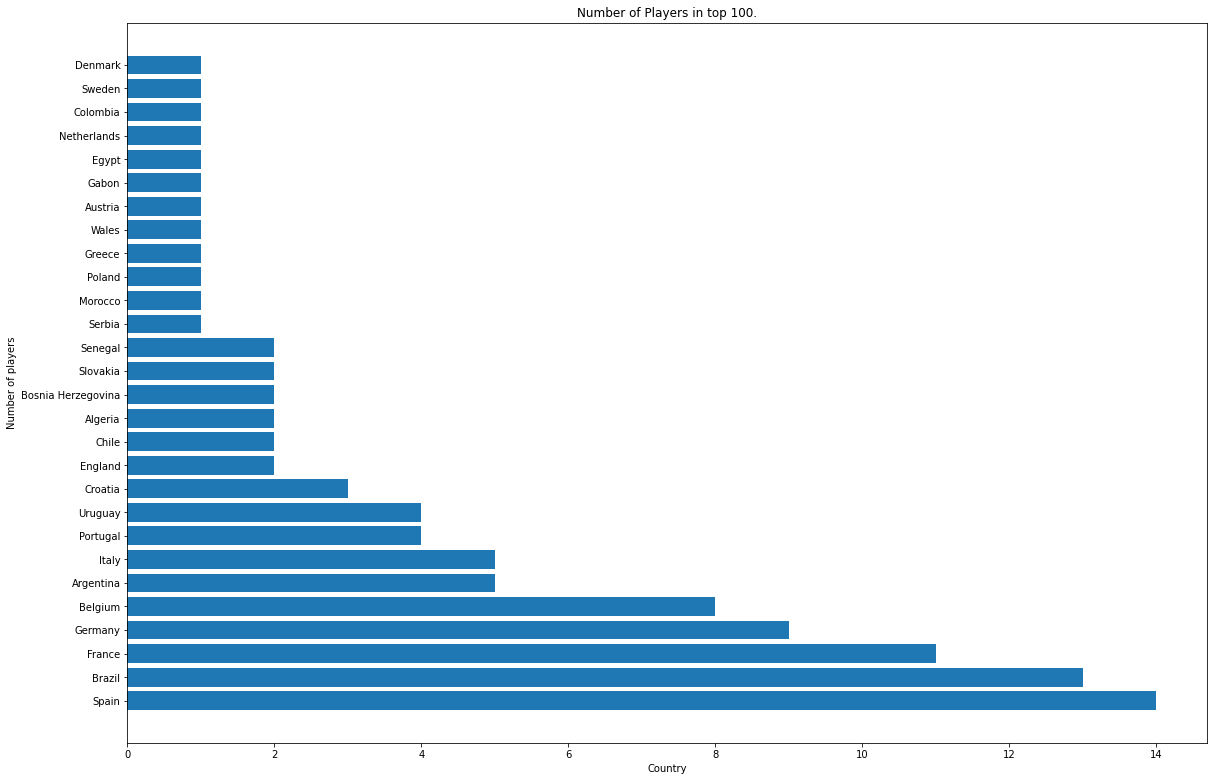

In [26]:
figure = plt.figure(figsize = (15, 10))
x = figure.add_axes([0,0,1,1])
x.set_ylabel('Number of players')
x.set_xlabel('Country')
x.set_title('Number of Players in top 100.')
x.barh(list(country_data.keys()), list(country_data.values()))
plt.show()

### Creating a Test Set
Splitting the data into train and test set.

In [27]:
ds_train, ds_test = train_test_split(df, test_size=0.2, random_state=0)

In [28]:
ds_train.shape, ds_test.shape

((11794, 84), (2949, 84))

Finding Correlations in df attributes with the corr() method

In [29]:
ds_corr_matrix = ds_train.corr()

In [30]:
ds_corr_matrix

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,1.000000,-0.737613,-0.433324,0.039490,-0.154339,-0.218117,-0.421379,-0.372530,-0.110597,-0.158654,0.195048,-0.283037,-0.176030,-0.295195,-0.322802,-0.285821,-0.155844,-0.314814,-0.333579,-0.319824,-0.292937,0.168703,0.170617,-0.033246,-0.420320,0.034021,-0.339409,-0.175331,-0.162425,-0.292681,-0.298283,-0.366120,-0.244311,-0.213943,-0.296019,-0.270957,-0.480001,-0.203944,-0.171620,-0.144051,-0.063493,-0.080877,-0.069758,-0.066026,-0.064776,-0.139428
Age,-0.737613,1.000000,0.468041,-0.248563,0.084992,0.152127,0.418016,0.260443,0.099337,0.114877,-0.257333,0.269022,0.152862,0.351140,0.315255,0.254960,0.112762,0.265215,0.317634,0.307727,0.264830,-0.206000,-0.199500,-0.018069,0.463998,-0.092865,0.318230,0.181555,0.224190,0.367609,0.282376,0.407785,0.283571,0.199772,0.249248,0.259764,0.484201,0.234477,0.206069,0.178996,0.067016,0.074373,0.071829,0.075107,0.077979,0.067586
Overall,-0.433324,0.468041,1.000000,0.653645,0.633998,0.575054,0.797455,0.505352,0.206237,0.509606,-0.221918,0.502809,0.374843,0.474751,0.727043,0.451925,0.516726,0.507559,0.460770,0.592199,0.721186,0.148023,0.166489,0.237770,0.851388,0.055677,0.565399,0.227547,0.464490,0.348916,0.504131,0.468046,0.348908,0.439137,0.530204,0.395262,0.807975,0.316509,0.276632,0.237953,0.041676,0.052848,0.057108,0.040357,0.044731,0.621398
Potential,0.039490,-0.248563,0.653645,1.000000,0.583701,0.488288,0.471453,0.379306,0.140742,0.418168,0.007042,0.279433,0.253765,0.232247,0.502884,0.268381,0.415357,0.312993,0.237397,0.371747,0.522724,0.228641,0.232795,0.208525,0.513267,0.116632,0.329503,0.071642,0.210231,0.052252,0.289029,0.166801,0.148189,0.272001,0.352194,0.230917,0.474699,0.157127,0.134814,0.117593,-0.022527,-0.016238,-0.006956,-0.019608,-0.034575,0.586470
Value,-0.154339,0.084992,0.633998,0.583701,1.000000,0.860889,0.493557,0.661467,0.160575,0.386375,-0.098908,0.307170,0.291459,0.245825,0.464074,0.331304,0.379632,0.340725,0.301797,0.360433,0.480775,0.170938,0.173583,0.191289,0.553185,0.104568,0.345167,0.108171,0.259628,0.119562,0.328256,0.201017,0.146424,0.319036,0.379637,0.277427,0.498119,0.137614,0.108798,0.083757,0.004414,0.001951,0.010069,0.007895,0.001826,0.994260
Wage,-0.218117,0.152127,0.575054,0.488288,0.860889,1.000000,0.451415,0.676120,0.135641,0.310498,-0.088583,0.287125,0.239170,0.261196,0.414298,0.291662,0.321944,0.304679,0.264510,0.325180,0.422870,0.109982,0.117041,0.142108,0.505431,0.071503,0.314576,0.117171,0.215191,0.135521,0.286697,0.219080,0.169961,0.273510,0.328737,0.255408,0.458802,0.157074,0.136176,0.117252,0.009181,0.002710,0.007664,0.003802,0.000217,0.853675
Special,-0.421379,0.418016,0.797455,0.471453,0.493557,0.451415,1.000000,0.408945,0.254815,0.591912,-0.176712,0.759171,0.531453,0.208177,0.823559,0.620655,0.736848,0.761251,0.708809,0.751483,0.829747,0.355425,0.332368,0.507362,0.754549,0.344700,0.703143,0.209737,0.569326,0.128725,0.729297,0.435188,0.333573,0.659046,0.768762,0.524408,0.745289,0.275750,0.258906,0.228556,0.067337,0.075912,0.081934,0.064662,0.062411,0.481506
International Reputation,-0.372530,0.260443,0.505352,0.379306,0.661467,0.676120,0.408945,1.000000,0.127315,0.276228,-0.077965,0.270769,0.224070,0.253668,0.371113,0.312287,0.280417,0.309531,0.282336,0.302854,0.373633,0.027920,0.025701,0.093568,0.460697,0.050559,0.312524,0.109878,0.117008,0.125567,0.276682,0.212534,0.151431,0.253065,0.310535,0.286870,0.447627,0.140588,0.111937,0.094367,-0.012084,-0.014772,-0.009137,-0.008002,-0.016536,0.644271
Weak Foot,-0.110597,0.099337,0.206237,0.140742,0.160575,0.135641,0.2548

We can see correlations <br>


Let us specifically see which attributes have the highest correlation with target variable

In [31]:
ds_corr_matrix['Release Clause'].sort_values(ascending=False)

Release Clause              1.000000
Value                       0.994260
Wage                        0.853675
International Reputation    0.644271
Overall                     0.621398
Potential                   0.586470
Reactions                   0.541031
Composure                   0.485010
Special                     0.481506
BallControl                 0.472381
ShortPassing                0.456100
Skill Moves                 0.380144
Dribbling                   0.373119
Vision                      0.370282
LongPassing                 0.352226
ShotPower                   0.334576
Curve                       0.331988
Volleys                     0.319804
LongShots                   0.318905
Positioning                 0.311024
Crossing                    0.299934
FKAccuracy                  0.291800
Finishing                   0.285164
Penalties                   0.267904
Stamina                     0.249080
HeadingAccuracy             0.239646
Aggression                  0.193783
A

#### Scatter Pair Plots for few attributes.

array([[<AxesSubplot:xlabel='Release Clause', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='Overall', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='Potential', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='Value', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='Wage', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='Age', ylabel='Release Clause'>,
        <AxesSubplot:xlabel='International Reputation', ylabel='Release Clause'>],
       [<AxesSubplot:xlabel='Release Clause', ylabel='Overall'>,
        <AxesSubplot:xlabel='Overall', ylabel='Overall'>,
        <AxesSubplot:xlabel='Potential', ylabel='Overall'>,
        <AxesSubplot:xlabel='Value', ylabel='Overall'>,
        <AxesSubplot:xlabel='Wage', ylabel='Overall'>,
        <AxesSubplot:xlabel='Age', ylabel='Overall'>,
        <AxesSubplot:xlabel='International Reputation', ylabel='Overall'>],
       [<AxesSubplot:xlabel='Release Clause', ylabel='Potential'>,
        <AxesSubplot:xlabel='Overall

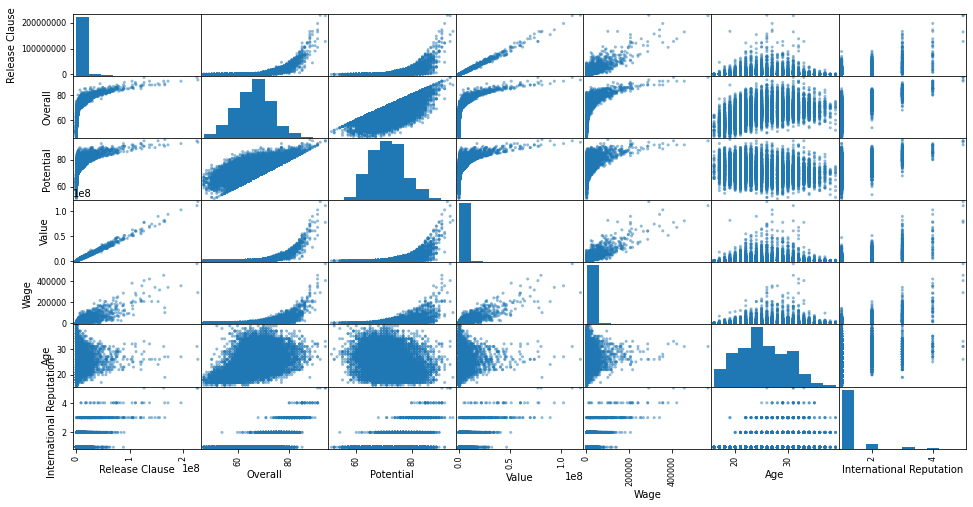

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["Release Clause", "Overall", "Potential", "Value", "Wage", "Age", "International Reputation"]
scatter_matrix(ds_train[attributes], figsize=(16, 8))

#### Majority of important attributes are categorical such as Nationality, Club, etc. These will need to be converted into numerical values.

In [34]:
obj_df = ds_train.select_dtypes(include=['object']).copy()
obj_df.head()

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4148,W. Mesloub,Algeria,Racing Club de Lens,Right,High/ Medium,Lean,No,CAM,"Jan 27, 2018",2021,5'11,152,66+2,66+2,66+2,68+2,68+2,68+2,68+2,68+2,69+2,69+2,69+2,69+2,70+2,70+2,70+2,69+2,67+2,67+2,67+2,67+2,67+2,66+2,64+2,64+2,64+2,66+2
8394,T. Vlietinck,Belgium,Club Brugge KV,Right,Medium/ Medium,Lean,No,RM,"Jul 1, 2015",2020,5'10,154,60+2,60+2,60+2,65+2,63+2,63+2,63+2,65+2,64+2,64+2,64+2,66+2,61+2,61+2,61+2,66+2,61+2,56+2,56+2,56+2,61+2,60+2,52+2,52+2,52+2,60+2
7571,D. Post,Netherlands,VVV-Venlo,Right,Medium/ High,Normal,No,CDM,"Jul 22, 2013",2022,6'3,207,60+2,60+2,60+2,59+2,61+2,61+2,61+2,59+2,62+2,62+2,62+2,61+2,66+2,66+2,66+2,61+2,63+2,67+2,67+2,67+2,63+2,62+2,64+2,64+2,64+2,62+2
13568,L. Wilkinson,England,Stevenage,Right,Medium/ Medium,Normal,No,CB,"Jan 22, 2016",2022,6'2,163,43+2,43+2,43+2,35+2,36+2,36+2,36+2,35+2,35+2,35+2,35+2,38+2,40+2,40+2,40+2,38+2,51+2,53+2,53+2,53+2,51+2,54+2,61+2,61+2,61+2,54+2
7870,Dani Rodríguez,Spain,RCD Mallorca,Right,Medium/ Medium,Normal,No,RCM,"Jul 2, 2018",2021,5'10,157,64+2,64+2,64+2,65+2,65+2,65+2,65+2,65+2,66+2,66+2,66+2,65+2,66+2,66+2,66+2,65+2,63+2,64+2,64+2,64+2,63+2,63+2,62+2,62+2,62+2,63+2


In [36]:
obj_df['Work Rate'].value_counts()

Medium/ Medium    5667
High/ Medium      2331
Medium/ High      1250
High/ High         774
Medium/ Low        608
High/ Low          499
Low/ Medium        329
Low/ High          312
Low/ Low            24
Name: Work Rate, dtype: int64

In [37]:
obj_df['Position'].value_counts()

ST     1528
CB     1323
CM     1039
LB     1008
RB      951
RM      828
LM      804
CAM     694
CDM     690
RCB     491
LCB     456
LCM     292
RCM     289
LW      271
RW      256
LDM     178
RDM     177
RS      142
LS      138
RWB      66
LWB      58
CF       56
RAM      20
LAM      17
LF       14
RF        8
Name: Position, dtype: int64

### - Years spent at club
### - Years on contract
### - Convert height to inches